In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# print all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Ref - https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv

In [35]:
# import data
df = pd.read_csv("aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# EDA

In [36]:
df.shape

(19158, 14)

In [37]:
df.describe(include='all')

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
count,19158.000000,19158,19158.000000,14650,19158,18772,18698,16345,19093,13220,13018,18735,19158.000000,19158.000000
unique,NaN,123,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,4355,NaN,13221,13792,13817,11598,14492,3286,3083,9817,8040,NaN,NaN
mean,16875.358179,NaN,0.828848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.366896,0.249348
std,9616.292592,NaN,0.123362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.058462,0.432647
min,1.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8554.250000,NaN,0.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,16982.500000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25169.750000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,0.000000


In [38]:
# drop unnecessary columns
df.drop(['enrollee_id', 'city'], axis = 1, inplace=True)
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Investigating Categorical Variables

### `gender`

In [39]:
# value_counts
df['gender'].value_counts(dropna = False)

Male      13221
NaN        4508
Female     1238
Other       191
Name: gender, dtype: int64

Since `number of females << number of males`, we will convert this into a binary feature - `Male = 1 and Rest = 0`

In [40]:
df['gender'] = df['gender'].map(lambda x : 1 if x == 'Male' else 0)
df['gender'].value_counts(dropna = False)

1    13221
0     5937
Name: gender, dtype: int64

### `relevant_experience`

In [41]:
# value_counts
df['relevent_experience'].value_counts(dropna = False)

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [42]:
# binarizing relevent_experience
df['relevent_experience'] = df['relevent_experience'].map(lambda x : 1 if x == 'Has relevent experience' else 0)
df['relevent_experience'].value_counts(dropna = False)

1    13792
0     5366
Name: relevent_experience, dtype: int64

### Academics - `enrolled_university`, `education_level`, `major_discipline`

In [63]:
df.isna().sum()

city_development_index       0
gender                       0
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [43]:
# value_counts
df['enrolled_university'].value_counts(dropna = False)

no_enrollment       13817
Full time course     3757
Part time course     1198
NaN                   386
Name: enrolled_university, dtype: int64

In [48]:
df['education_level'].value_counts(dropna = False)

Graduate          11598
Masters            4361
High School        2017
NaN                 460
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [49]:
df['major_discipline'].value_counts(dropna = False)

STEM               14492
NaN                 2813
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [62]:
for i in ['enrolled_university', 'education_level', 'major_discipline']:
    for j in ['enrolled_university', 'education_level', 'major_discipline']:
        if i != j:
            print("when %s is null" % (i))
            print(df.loc[df[i].isna(), j].value_counts(dropna = False))
            print()
        else:
            continue

when enrolled_university is null
Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

when enrolled_university is null
STEM               208
NaN                157
Humanities           9
No Major             4
Other                4
Business Degree      2
Arts                 2
Name: major_discipline, dtype: int64

when education_level is null
no_enrollment       270
NaN                 100
Full time course     69
Part time course     21
Name: enrolled_university, dtype: int64

when education_level is null
NaN    460
Name: major_discipline, dtype: int64

when major_discipline is null
no_enrollment       1481
Full time course     976
Part time course     199
NaN                  157
Name: enrolled_university, dtype: int64

when major_discipline is null
High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: 

In [72]:
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1,1,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,1,0,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,0,0,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,0,0,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,1,1,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


#### Observations - 
1. `enrolled_university` - Majority of NULLS have graduation or higher education level, so we can assume that they did not enroll to any university course. Remaining values can be assumed as "not enrolled" too.

2. `education_level` - We plan to make this variable have 3 categories - "High School or Lower", "Graduation" and "Post Graduation". We can then club NULLS with "High School or Lower" category since their `major_discipline` is also NULL (heavy majority of the cases where Major Discipline is NULL have education up to High School only). 

3. `major_discipline` - We plan to make this a binary variable - "STEM" and "Non-STEM". Now, heavy majority of the cases where Major Discipline is NULL have education up to High School only. So, we will simply put NULLS into "Non-STEM" category.

when enrolled_university is null

when enrolled_university is null

when education_level is null

when education_level is null


ValueError: min() arg is an empty sequence

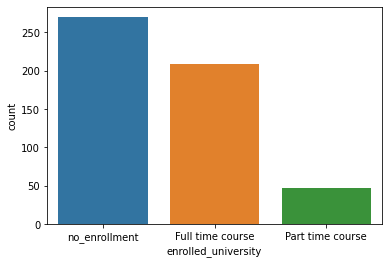

In [67]:
# sns.countplot(df.loc[df.education_level.isna(), 'enrolled_university'])

for i in ['enrolled_university', 'education_level', 'major_discipline']:
    for j in ['enrolled_university', 'education_level', 'major_discipline']:
        if i != j:
            print("when %s is null" % (i))
#             print(df.loc[df[i].isna(), j].value_counts(dropna = False))
            sns.countplot(df.loc[df[i].isna(), j])
            print()
        else:
            continue